# Model Training with SMOTE

In this notebook, we address class imbalance in the dataset by applying SMOTE (Synthetic Minority Oversampling Technique) and train various machine learning models. 

## Steps:
1. Data loading and preparation of train and test sets
2. Creating multiple pipelines with standardiztion, SMOTE and 6 different machine learning algorithms (e.g. Logistic Regression, Random Forest, KNN, MLP)
3. Setting many different combinations of hyper-parameters for each machine learning algorithm
4. Using Grid Search with cross-validation to choose the best hyper-parameter combination for each machine learning algorithm
5. Train the best model for each machine learning algorithm on the whole training set and evaluate them on the test set
6. Comparison of model performance using metrics like balanced accuracy, recall, F1-score, precision, and ROC-AUC
7. Choose the best model out of all experiments


In [ ]:
#note that do not apply SMOTE on the test or validate set. Balancing is only for training data to prevent data leakage.
!pip install imbalanced-learn

In [1]:
# Import essential libraries for data analysis, visualization, and modeling

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pickle

## Data Loading and Preprocessing

- Load the processed dataset for training.
- Separate the features and target variable.
- Split the data into training and testing sets.
- Standardize/scale the data as needed for certain models (e.g., Logistic Regression, SVM).

In [2]:
# Load the dataset

file_path = '../data/processed/data.csv'
data = pd.read_csv(file_path)

data.shape

(6819, 79)

In [3]:
# Separate features (X) and target variable (Y)
X = data.drop(columns=['Bankrupt?'])  # Drop the target column
y = data['Bankrupt?']  # Target column

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Preprocessing the features

num_cols = X.select_dtypes(include=[float]).columns.to_list()

pipe_num = Pipeline([
    ('standardizer', StandardScaler())
])

prepoc = ColumnTransformer([
    ('num_transforms', pipe_num, num_cols)
], remainder='passthrough')
prepoc

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transforms',
                                 Pipeline(steps=[('standardizer',
                                                  StandardScaler())]),
                                 ['ROA(C) before interest and depreciation '
                                  'before interest',
                                  'ROA(A) before interest and % after tax',
                                  'ROA(B) before interest and depreciation '
                                  'after tax',
                                  'Realized Sales Gross Margin',
                                  'Pre-tax net Interest Rate',
                                  'After-tax net Interest Rate',
                                  'Non-in...
                                  'Cash Flow Per Share',
                                  'Revenue Per Share (Yuan ¥)',
                                  'Operating Profit Per Share (Yuan ¥)',
                                  'Per Share Net profit before tax (Yuan ¥)',
                                  'Operating Profit Growth Rate',
                                  'After-tax Net Profit Growth Rate',
                                  'Regular Net Profit Growth Rate',
                                  'Continuous Net Profit Growth Rate',
                                  'Total Asset Growth Rate',
                                  'Net Value Growth Rate',
                                  'Total Asset Return Growth Rate Ratio',
                                  'Cash Reinvestment %', 'Quick Ratio', ...])])

In this section, we create a pipeline for each classification model to streamline preprocessing, applying SMOTE and model training. The following models will be evaluated:

-  #### Logistic regression classifier
- #### Support vector machine classifier
- #### Decision tree classifier
- #### Random forrest classifier
- #### K nearest neighbors classifier
- #### Multi-layer perceptron classifier

In [6]:
# Logistic regression classifier pipeline

pipe1 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression())
])

pipe1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

In [7]:
# Support vector machine classifier pipeline

pipe2 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC())
])

pipe2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)), ('classifier', SVC())])

In [8]:
# Decision tree classifier pipeline

pipe3 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

pipe3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', DecisionTreeClassifier())])

In [9]:
# Random forrest classifier pipeline

pipe4 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

pipe4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier())])

In [10]:
# K nearest neighbors classifier pipeline

pipe5 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

pipe5

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', KNeighborsClassifier())])

In [11]:
# Multi-layer perceptron classifier pipeline

pipe6 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', MLPClassifier())
])

pipe6

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', MLPClassifier())])

### Defining Scoring Metrics and Hyperparameter Grids

In this section, we define the following:

1. **Scoring Metrics**:
   - Metrics with probability-based evaluation: `neg_log_loss`, `roc_auc`, `accuracy`, `balanced_accuracy`, `f1`, `precision`, and `recall`.
   - Metrics without probability-based evaluation: `accuracy`, `balanced_accuracy`, `f1`, `precision`, and `recall`.

2. **Hyperparameter Grids**:
   - Parameter grids for each classifier are defined for hyperparameter tuning using GridSearchCV. These include:
     - **Logistic Regression**: Tuning solvers, class weights, and iteration limits.
     - **Support Vector Machine (SVC)**: Tuning class weights and iteration limits.
     - **Decision Tree**: Tuning criteria, maximum depth, and class weights.
     - **Random Forest**: Tuning number of estimators, depth, and class weights.
     - **K-Nearest Neighbors (KNN)**: Tuning the number of neighbors and weight schemes.
     - **Multi-Layer Perceptron (MLP)**: Tuning hidden layer sizes, regularization (`alpha`), and iteration limits.

3. **Result Storage**:
   - A list, `best_test_scores`, is initialized to store the performance metrics of the best models for each classifier.

This setup is essential for systematic model training, hyperparameter optimization, and evaluation.


In [49]:
# Scoring metrics with probability
scoring_prob = ['neg_log_loss', 'roc_auc', 'accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']

# Scoring metrics without probability
scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']

# Logistic regression classifier pipelines
log_param = {
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'classifier__class_weight': ['balanced', None],
    'classifier__max_iter': [100, 150],
    'classifier__random_state': [42]
    }

# Support vector machine classifier pipelines
svc_param = {
    'classifier__class_weight': ['balanced', None],
    'classifier__max_iter': [100, 150],
    'classifier__random_state': [42]
    }

# Decision Tree classifier parameters
tree_param = {
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__class_weight': ['balanced', None],
    'classifier__random_state': [42]
    }

# Random forrest classifier parameters
forrest_param = {
    'classifier__n_estimators': [100, 150],
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [3, 5, 7],
    'classifier__class_weight': ['balanced', None],
    'classifier__random_state': [42]
    }

# K nearest neighbors classifier parameters
knn_param = {
    'classifier__n_neighbors': [5, 10, 15, 20],
    'classifier__weights': ['uniform', 'distance', None]
    }

# Multi-layer perceptron classifier parameters
mlp_param = {
    'classifier__hidden_layer_sizes': [(32,), (64,), (128,)],
    'classifier__alpha': [0.0001, 1, 100, 1000],
    'classifier__max_iter': [20, 50], # Numver of epoches
    'classifier__random_state': [42]
    }

best_test_scores = []

### Grid Search with Cross-Validation for Logistic Regression (with SMOTE)

This section uses **GridSearchCV** to perform hyperparameter tuning for the Logistic Regression classifier. 

- **Pipeline**: The pipeline integrates SMOTE for handling class imbalance and Logistic Regression for classification.
- **Parameter Grid**: The grid (`log_param`) defines different solvers, class weights, and iteration limits to tune.
- **Scoring Metrics**: Multiple metrics (`scoring_prob`) are evaluated, including `balanced_accuracy`, `roc_auc`, and `neg_log_loss`.
- **Cross-Validation**: A 5-fold cross-validation is used for robust performance evaluation.
- **Results**: The cross-validation results are stored in a DataFrame and sorted by `rank_test_balanced_accuracy` to identify the best configuration.


In [13]:
grid_cv1 = GridSearchCV(
    estimator=pipe1, 
    param_grid=log_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv1.fit(X_train, y_train)

res = grid_cv1.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
17,0.416819,"{'classifier__class_weight': None, 'classifier...",0.867461,23,0.832630,1,0.795397,1,0.278735,23,0.169210,23,-0.338634,7,0.911949,1
5,0.408789,"{'classifier__class_weight': 'balanced', 'clas...",0.867461,23,0.832630,1,0.795397,1,0.278735,23,0.169210,23,-0.338634,7,0.911949,1
11,0.616145,"{'classifier__class_weight': 'balanced', 'clas...",0.871311,21,0.831936,3,0.789841,3,0.283160,7,0.172685,19,-0.335092,3,0.908166,3
23,0.610925,"{'classifier__class_weight': None, 'classifier...",0.871311,21,0.831936,3,0.789841,3,0.283160,7,0.172685,19,-0.335092,3,0.908166,3
4,0.366319,"{'classifier__class_weight': 'balanced', 'clas...",0.872594,19,0.827074,5,0.778413,5,0.282189,11,0.172512,21,-0.334471,1,0.906903,5
16,0.366308,"{'classifier__class_weight': None, 'classifier...",0.872594,19,0.827074,5,0.778413,5,0.282189,11,0.172512,21,-0.334471,1,0.906903,5
22,0.553201,"{'classifier__class_weight': None, 'classifier...",0.874610,17,0.825353,7,0.772698,7,0.284144,1,0.174270,15,-0.335807,5,0.905173,7
10,0.544618,"{'classifier__class_weight': 'balanced', 'clas...",0.874610,17,0.825353,7,0.772698,7,0.284144,1,0.174270,15,-0.335807,5,0.905173,7
19,0.225012,"{'classifier__class_weight': None, 'classifier...",0.879560,11,0.811574,9,0.738889,9,0.283570,3,0.175602,1,-0.356716,17,0.891087,11
1,0.206451,"{'classifier__class_weight': 'balanced', 'clas...",0.879560,11,0.811574,9,0.738889,9,0.283570,3,0.175602,1,-0.356716,17,0.891087,11


In [14]:
grid_cv1.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_iter': 100,
 'classifier__random_state': 42,
 'classifier__solver': 'saga'}

### Evaluating the Best Logistic Regression Model (with SMOTE)

After hyperparameter tuning with **GridSearchCV**, we evaluate the best Logistic Regression model on the test set. 

Steps:
1. **Retrieve Best Model**: The best estimator (`best_estimator_`) from GridSearchCV is used for predictions.
2. **Predictions**:
   - `y_pred_test`: Predicted class labels for the test set.
   - `y_proba_test`: Predicted probabilities for the test set.
3. **Performance Evaluation**:
   - Metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are computed.
4. **Result Storage**:
   - Append the evaluation metrics to `best_test_scores` for later comparison with other models.
   - Store detailed test performance in the `performance_metrics` dictionary for further analysis.


In [56]:
model1 = grid_cv1.best_estimator_

y_pred_test = model1.predict(X_test)
y_proba_test = model1.predict_proba(X_test)

best_test_scores.append(['Logistic Regression', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8717008797653959,
 'balanced_accuracy_score_test': 0.8458333333333334,
 'recall_score_test': 0.8181818181818182,
 'f1_score_test': 0.291497975708502,
 'precision_score_test': 0.17733990147783252,
 'log_loss_test': 0.3176744217178027,
 'roc_auc_score_test': 0.9345213498622591}

### Grid Search with Cross-Validation for Support Vector Machine (SVM) Classifier (with SMOTE)

This section performs hyperparameter tuning for the SVM classifier using **GridSearchCV**.

- **Pipeline**: The pipeline integrates SMOTE for handling class imbalance and SVM for classification.
- **Parameter Grid**: The grid (`svc_param`) includes parameters such as class weights and maximum iterations to optimize.
- **Scoring Metrics**: Multiple evaluation metrics (`scoring`) are used, including `balanced_accuracy`, `precision`, and `recall`.
- **Cross-Validation**: A 5-fold cross-validation is used for robust evaluation.
- **Results**: The cross-validation results are stored in a DataFrame and sorted by `rank_test_balanced_accuracy` to identify the best hyperparameter configuration.


In [16]:
grid_cv2 = GridSearchCV(
    estimator=pipe2, 
    param_grid=svc_param, 
    scoring = scoring,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv2.fit(X_train, y_train)

res = grid_cv2.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participan

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision
0,0.069831,"{'classifier__class_weight': 'balanced', 'clas...",0.207516,1,0.464028,1,0.738254,3,0.056860,1,0.029571,1
2,0.070041,"{'classifier__class_weight': None, 'classifier...",0.207516,1,0.464028,1,0.738254,3,0.056860,1,0.029571,1
1,0.095433,"{'classifier__class_weight': 'balanced', 'clas...",0.195234,3,0.460447,3,0.743968,1,0.056368,3,0.029294,3
3,0.095770,"{'classifier__class_weight': None, 'classifier...",0.195234,3,0.460447,3,0.743968,1,0.056368,3,0.029294,3


In [17]:
grid_cv2.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_iter': 100,
 'classifier__random_state': 42}

### Evaluating the Best Support Vector Machine (SVM) Model (with SMOTE)

The best SVM model from GridSearchCV is evaluated on the test set. Metrics such as accuracy, balanced accuracy, recall, F1-score, and precision are computed and stored for comparison. Note that probability-based metrics like log loss and ROC-AUC are not applicable for this model.


In [57]:
model2 = grid_cv2.best_estimator_

y_pred_test = model2.predict(X_test)

best_test_scores.append(['SVC', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), 'NA', 'NA'])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
}
performance_metrics

{'accuracy_score_test': 0.1598240469208211,
 'balanced_accuracy_score_test': 0.4340909090909091,
 'recall_score_test': 0.7272727272727273,
 'f1_score_test': 0.05289256198347107,
 'precision_score_test': 0.0274442538593482}

### Grid Search with Cross-Validation for Decision Tree Classifier (with SMOTE)

This section uses **GridSearchCV** to tune hyperparameters for the Decision Tree classifier.

- **Pipeline**: Includes SMOTE for handling class imbalance and Decision Tree for classification.
- **Parameter Grid**: The grid (`tree_param`) optimizes parameters like splitting criterion, max depth, and class weights.
- **Scoring Metrics**: Multiple metrics (`scoring_prob`), such as balanced accuracy and ROC-AUC, are evaluated.
- **Cross-Validation**: A 5-fold cross-validation ensures robust evaluation.
- **Results**: The results are stored in a DataFrame and sorted by `rank_test_balanced_accuracy` to identify the best configuration.


In [19]:
grid_cv3 = GridSearchCV(
    estimator=pipe3, 
    param_grid=tree_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv3.fit(X_train, y_train)

res = grid_cv3.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
0,0.171622,"{'classifier__class_weight': 'balanced', 'clas...",0.838863,7,0.814852,1,0.789206,1,0.239315,7,0.141241,7,-0.362551,1,0.869498,1
4,0.161688,"{'classifier__class_weight': None, 'classifier...",0.838863,7,0.814852,1,0.789206,1,0.239315,7,0.141241,7,-0.362551,1,0.869498,1
1,0.265431,"{'classifier__class_weight': 'balanced', 'clas...",0.881760,5,0.774117,3,0.659048,3,0.267108,3,0.168224,5,-0.423557,3,0.836377,3
5,0.251031,"{'classifier__class_weight': None, 'classifier...",0.881760,5,0.774117,3,0.659048,3,0.267108,3,0.168224,5,-0.423557,3,0.836377,3
2,0.447929,"{'classifier__class_weight': 'balanced', 'clas...",0.913474,3,0.730204,5,0.534286,5,0.287271,1,0.197837,3,-1.353025,5,0.717518,5
6,0.408946,"{'classifier__class_weight': None, 'classifier...",0.913474,3,0.730204,5,0.534286,5,0.287271,1,0.197837,3,-1.353025,5,0.717518,5
3,0.861322,"{'classifier__class_weight': 'balanced', 'clas...",0.931072,1,0.665268,7,0.381111,7,0.259249,5,0.198233,1,-2.484402,7,0.665268,7
7,0.779827,"{'classifier__class_weight': None, 'classifier...",0.931072,1,0.665268,7,0.381111,7,0.259249,5,0.198233,1,-2.484402,7,0.665268,7


In [20]:
grid_cv3.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 3,
 'classifier__random_state': 42}

### Evaluating the Best Decision Tree Model (with SMOTE)

The best Decision Tree model from GridSearchCV is evaluated on the test set. Metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are computed and stored for comparison.


In [58]:
model3 = grid_cv3.best_estimator_

y_pred_test = model3.predict(X_test)
y_proba_test = model3.predict_proba(X_test)

best_test_scores.append(['Decision Tree', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8108504398826979,
 'balanced_accuracy_score_test': 0.8253787878787879,
 'recall_score_test': 0.8409090909090909,
 'f1_score_test': 0.22289156626506024,
 'precision_score_test': 0.1284722222222222,
 'log_loss_test': 0.31092465110930056,
 'roc_auc_score_test': 0.8869232093663911}

### Grid Search with Cross-Validation for Random Forest Classifier (with SMOTE)

This section performs hyperparameter tuning for the Random Forest classifier using **GridSearchCV**.

- **Pipeline**: Includes SMOTE to handle class imbalance and Random Forest for classification.
- **Parameter Grid**: The grid (`forrest_param`) optimizes the number of estimators, max depth, and class weights.
- **Scoring Metrics**: Metrics like balanced accuracy, ROC-AUC, and log loss are evaluated.
- **Cross-Validation**: A 5-fold cross-validation ensures reliable evaluation.
- **Results**: Results are stored in a DataFrame and sorted by `rank_test_balanced_accuracy` to find the best configuration.


In [22]:
grid_cv4 = GridSearchCV(
    estimator=pipe4, 
    param_grid= forrest_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv4.fit(X_train, y_train)

res = grid_cv4.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
2,1.770671,"{'classifier__class_weight': 'balanced', 'clas...",0.894409,5,0.849315,1,0.801111,5,0.327212,5,0.206005,5,-0.240751,5,0.929895,3
8,1.768618,"{'classifier__class_weight': None, 'classifier...",0.894409,5,0.849315,1,0.801111,5,0.327212,5,0.206005,5,-0.240751,5,0.929895,3
1,1.736209,"{'classifier__class_weight': 'balanced', 'clas...",0.865628,11,0.848098,3,0.829365,1,0.283874,9,0.171410,9,-0.307595,11,0.927256,11
7,1.698206,"{'classifier__class_weight': None, 'classifier...",0.865628,11,0.848098,3,0.829365,1,0.283874,9,0.171410,9,-0.307595,11,0.927256,11
3,2.637505,"{'classifier__class_weight': 'balanced', 'clas...",0.893859,7,0.846189,5,0.795238,7,0.324644,7,0.204368,7,-0.240897,7,0.929986,1
9,2.557769,"{'classifier__class_weight': None, 'classifier...",0.893859,7,0.846189,5,0.795238,7,0.324644,7,0.204368,7,-0.240897,7,0.929986,1
0,1.135208,"{'classifier__class_weight': 'balanced', 'clas...",0.867278,9,0.840662,7,0.812222,3,0.282037,11,0.170938,11,-0.306581,9,0.927777,9
6,1.101354,"{'classifier__class_weight': None, 'classifier...",0.867278,9,0.840662,7,0.812222,3,0.282037,11,0.170938,11,-0.306581,9,0.927777,9
5,3.301911,"{'classifier__class_weight': 'balanced', 'clas...",0.919707,1,0.826713,9,0.727302,9,0.367743,1,0.246840,1,-0.191975,1,0.929850,5
11,3.283312,"{'classifier__class_weight': None, 'classifier...",0.919707,1,0.826713,9,0.727302,9,0.367743,1,0.246840,1,-0.191975,1,0.929850,5


In [23]:
grid_cv4.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100,
 'classifier__random_state': 42}

### Evaluating the Best Random Forest Model (with SMOTE)

The best Random Forest model from GridSearchCV is evaluated on the test set. Metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are computed and stored for comparison.


In [59]:
model4 = grid_cv4.best_estimator_

y_pred_test = model4.predict(X_test)
y_proba_test = model4.predict_proba(X_test)

best_test_scores.append(['Random Forrest', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8900293255131965,
 'balanced_accuracy_score_test': 0.8662878787878788,
 'recall_score_test': 0.8409090909090909,
 'f1_score_test': 0.33035714285714285,
 'precision_score_test': 0.20555555555555555,
 'log_loss_test': 0.23741062012903486,
 'roc_auc_score_test': 0.9444645316804408}

### Grid Search with Cross-Validation for K-Nearest Neighbors (KNN) Classifier (with SMOTE)

This section performs hyperparameter tuning for the KNN classifier using **GridSearchCV**.

- **Pipeline**: Includes SMOTE to address class imbalance and KNN for classification.
- **Parameter Grid**: The grid (`knn_param`) optimizes the number of neighbors and weight schemes.
- **Scoring Metrics**: Metrics like balanced accuracy, ROC-AUC, and log loss are evaluated.
- **Cross-Validation**: A 5-fold cross-validation ensures robust performance evaluation.
- **Results**: Results are saved in a DataFrame and sorted by `rank_test_balanced_accuracy` to identify the best configuration.


In [50]:
grid_cv5 = GridSearchCV(
    estimator=pipe5, 
    param_grid= knn_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv5.fit(X_train, y_train)

res = grid_cv5.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
9,0.019202,"{'classifier__n_neighbors': 20, 'classifier__w...",0.821632,10,0.806427,1,0.790159,1,0.222254,10,0.129416,10,-1.047964,2,0.879215,2
11,0.026959,"{'classifier__n_neighbors': 20, 'classifier__w...",0.821632,10,0.806427,1,0.790159,1,0.222254,10,0.129416,10,-1.047964,2,0.879215,2
10,0.024983,"{'classifier__n_neighbors': 20, 'classifier__w...",0.821265,12,0.803475,3,0.784444,3,0.220684,12,0.128495,12,-1.037312,1,0.879367,1
7,0.024258,"{'classifier__n_neighbors': 15, 'classifier__w...",0.832997,7,0.801249,4,0.767302,4,0.228839,7,0.134596,7,-1.119459,4,0.875151,4
6,0.022998,"{'classifier__n_neighbors': 15, 'classifier__w...",0.830064,8,0.799734,5,0.767302,4,0.225624,8,0.132360,8,-1.129702,5,0.875027,5
8,0.022611,"{'classifier__n_neighbors': 15, 'classifier__w...",0.830064,8,0.799734,5,0.767302,4,0.225624,8,0.132360,8,-1.129702,5,0.875027,5
4,0.021642,"{'classifier__n_neighbors': 10, 'classifier__w...",0.858662,6,0.778835,7,0.693492,7,0.240029,6,0.145226,6,-1.290693,7,0.864379,7
3,0.020724,"{'classifier__n_neighbors': 10, 'classifier__w...",0.861412,4,0.777493,8,0.687778,8,0.241903,4,0.146876,4,-1.299453,8,0.863863,8
5,0.023982,"{'classifier__n_neighbors': 10, 'classifier__w...",0.861412,4,0.777493,8,0.687778,8,0.241903,4,0.146876,4,-1.299453,8,0.863863,8
1,0.021527,"{'classifier__n_neighbors': 5, 'classifier__we...",0.878460,1,0.772569,10,0.659365,10,0.259050,1,0.161283,1,-1.720100,10,0.817676,10


In [52]:
grid_cv5.best_params_

{'classifier__n_neighbors': 20, 'classifier__weights': 'uniform'}

### Evaluating the Best K-Nearest Neighbors (KNN) Model (with SMOTE)

The best KNN model from GridSearchCV is evaluated on the test set. Metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are calculated and stored for comparison.


In [60]:
model5 = grid_cv5.best_estimator_

y_pred_test = model5.predict(X_test)
y_proba_test = model5.predict_proba(X_test)

best_test_scores.append(['KNN', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8372434017595308,
 'balanced_accuracy_score_test': 0.85,
 'recall_score_test': 0.8636363636363636,
 'f1_score_test': 0.2550335570469799,
 'precision_score_test': 0.14960629921259844,
 'log_loss_test': 0.9564889273395834,
 'roc_auc_score_test': 0.9123708677685951}

### Grid Search with Cross-Validation for Multi-Layer Perceptron (MLP) Classifier (with SMOTE)

This section performs hyperparameter tuning for the MLP classifier using **GridSearchCV**.

- **Pipeline**: Includes SMOTE for balancing classes and MLP for classification.
- **Parameter Grid**: The grid (`mlp_param`) optimizes hidden layer sizes, regularization (`alpha`), and the number of iterations.
- **Scoring Metrics**: Metrics like balanced accuracy, ROC-AUC, and log loss are evaluated.
- **Cross-Validation**: A 5-fold cross-validation ensures reliable evaluation.
- **Results**: The results are stored in a DataFrame and sorted by `rank_test_balanced_accuracy` to identify the best configuration.


In [53]:
grid_cv6 = GridSearchCV(
    estimator=pipe6, 
    param_grid= mlp_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv6.fit(X_train, y_train)

res = grid_cv6.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warning

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
14,0.410431,"{'classifier__alpha': 100, 'classifier__hidden...",0.861778,16,0.854397,1,0.846508,4,0.283428,16,0.170364,17,-0.465332,16,0.921321,2
15,0.966367,"{'classifier__alpha': 100, 'classifier__hidden...",0.866178,15,0.853989,2,0.840952,6,0.290285,13,0.175910,14,-0.464323,15,0.921202,3
12,0.367037,"{'classifier__alpha': 100, 'classifier__hidden...",0.854079,18,0.853182,3,0.852222,3,0.274186,18,0.163527,19,-0.480046,18,0.921631,1
13,0.852633,"{'classifier__alpha': 100, 'classifier__hidden...",0.855362,17,0.851083,4,0.846508,4,0.274641,17,0.164100,18,-0.466205,17,0.921167,4
16,0.547006,"{'classifier__alpha': 100, 'classifier__hidden...",0.869294,13,0.849992,5,0.829365,7,0.290041,14,0.175804,15,-0.457889,14,0.921101,6
17,1.143503,"{'classifier__alpha': 100, 'classifier__hidden...",0.868011,14,0.849248,6,0.829206,8,0.287997,15,0.174552,16,-0.451583,13,0.921139,5
6,0.363124,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.904308,12,0.813153,7,0.715714,9,0.327091,11,0.212544,12,-0.257545,12,0.893873,9
8,0.428012,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.909808,11,0.805262,8,0.693492,10,0.333476,10,0.220196,11,-0.246591,9,0.891149,10
7,0.905026,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.920257,8,0.796849,9,0.664921,11,0.353608,2,0.242255,8,-0.219910,4,0.890561,11
0,0.378677,"{'classifier__alpha': 0.0001, 'classifier__hid...",0.917507,10,0.787062,10,0.647619,12,0.339050,8,0.230900,10,-0.248033,10,0.875303,15


In [55]:
grid_cv6.best_params_

{'classifier__alpha': 100,
 'classifier__hidden_layer_sizes': (64,),
 'classifier__max_iter': 20,
 'classifier__random_state': 42}

### Evaluating the Best Multi-Layer Perceptron (MLP) Model (with SMOTE)

The best MLP model from GridSearchCV is evaluated on the test set. Metrics such as accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC are computed and stored for comparison.


In [61]:
model6 = grid_cv6.best_estimator_

y_pred_test = model6.predict(X_test)
y_proba_test = model6.predict_proba(X_test)

best_test_scores.append(['MLP', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8687683284457478,
 'balanced_accuracy_score_test': 0.8662878787878787,
 'recall_score_test': 0.8636363636363636,
 'f1_score_test': 0.2980392156862745,
 'precision_score_test': 0.18009478672985782,
 'log_loss_test': 0.44749810838269916,
 'roc_auc_score_test': 0.9076618457300275}

### Comparing Model Performance on the Test Set

This section summarizes and compares the performance of all models evaluated on the test set. The metrics include accuracy, balanced accuracy, recall, F1-score, precision, log loss, and ROC-AUC. The results are displayed in a DataFrame, sorted by `balanced accuracy(test)` in descending order to highlight the best-performing model.


In [62]:
pd.DataFrame(best_test_scores,
             columns = ['pipleline', 'accuracy(test)', 'balanced accuracy(test)', 'recall(test)', 'f1(test)',
                        'precision(test)', 'log loss(test)', 'roc auc(test)']).sort_values('balanced accuracy(test)',ascending = False)

,pipleline,accuracy(test),balanced accuracy(test),recall(test),f1(test),precision(test),log loss(test),roc auc(test)
3,Random Forrest,0.890029,0.866288,0.840909,0.330357,0.205556,0.237411,0.944465
5,MLP,0.868768,0.866288,0.863636,0.298039,0.180095,0.447498,0.907662
4,KNN,0.837243,0.850000,0.863636,0.255034,0.149606,0.956489,0.912371
0,Logistic Regression,0.871701,0.845833,0.818182,0.291498,0.177340,0.317674,0.934521
2,Decision Tree,0.810850,0.825379,0.840909,0.222892,0.128472,0.310925,0.886923
1,SVC,0.159824,0.434091,0.727273,0.052893,0.027444,NA,NA


### Model Performance Comparison: Explanation

The table above summarizes the test set performance of all models trained with SMOTE. Key observations:

1. **Random Forest**:
   - Achieved the highest **balanced accuracy (0.8663)** and the best **ROC-AUC (0.9445)**.
   - Strong overall performance, making it the most suitable model for this dataset.

2. **Multi-Layer Perceptron (MLP)**:
   - Matched Random Forest in balanced accuracy (0.8663) and demonstrated strong recall (0.8636).
   - Slightly lower ROC-AUC (0.9077), indicating slightly less robust decision boundaries.

3. **K-Nearest Neighbors (KNN)**:
   - Balanced accuracy (0.8500) and ROC-AUC (0.9124) are competitive.
   - However, lower F1-score (0.2550) and precision (0.1496) highlight issues with positive class predictions.

4. **Logistic Regression**:
   - Balanced accuracy (0.8458) and ROC-AUC (0.9345) are strong, indicating reliable performance as a baseline model.

5. **Decision Tree**:
   - Achieved reasonable balanced accuracy (0.8254) and recall (0.8409).
   - Lower precision (0.1285) and F1-score (0.2229) suggest poor handling of class imbalance compared to ensemble methods.

6. **Support Vector Classifier (SVC)**:
   - Performed poorly with a very low accuracy (0.1598) and balanced accuracy (0.4341).
   - Indicates that SVC struggles significantly with class imbalance, even with SMOTE.

### Key Takeaways:
- **Random Forest** is the best-performing model overall due to its high balanced accuracy and ROC-AUC.
- **MLP** is a close second, offering competitive performance with strong recall.
- Models like KNN and Logistic Regression also perform well, but ensemble methods like Random Forest remain superior for this dataset.
- SVC's poor performance highlights its limitations in handling imbalanced datasets, even with SMOTE.


In [5]:
model4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        random_state=42))])

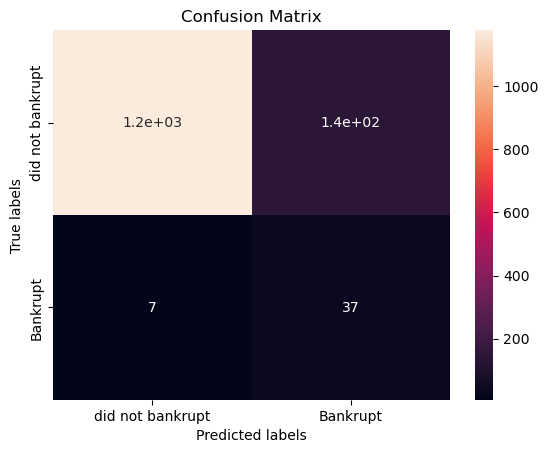

In [8]:
# Best model cofusion matrix
def plot_confusion_matrix(cm):
    "this function plots the confusion matrix"
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not bankrupt', 'Bankrupt']); ax.yaxis.set_ticklabels(['did not bankrupt', 'Bankrupt']) 
    plt.show()

y_pred_test = model4.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test))

### Feature Importance for the Best Model (with SMOTE)

In this section, we analyze the feature importances of the best-performing model, **Random Forest**, trained with SMOTE. Feature importance provides insights into which financial indicators contribute most to the predictions. The results are displayed in a sorted DataFrame for better visualization.


In [ ]:
# Best model with SMOTE Feature Importance

feature_importances = model4['classifier'].feature_importances_
feature_names = X_train.columns 

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
33,Borrowing dependency,0.119630
16,Persistent EPS in the Last Four Seasons,0.085596
7,Continuous interest rate (after tax),0.064367
75,Liability to Equity,0.060816
57,Retained Earnings to Total Assets,0.051855
...,...,...
44,Revenue per person,0.000000
40,Average Collection Days,0.000000
29,Quick Ratio,0.000000
26,Net Value Growth Rate,0.000000


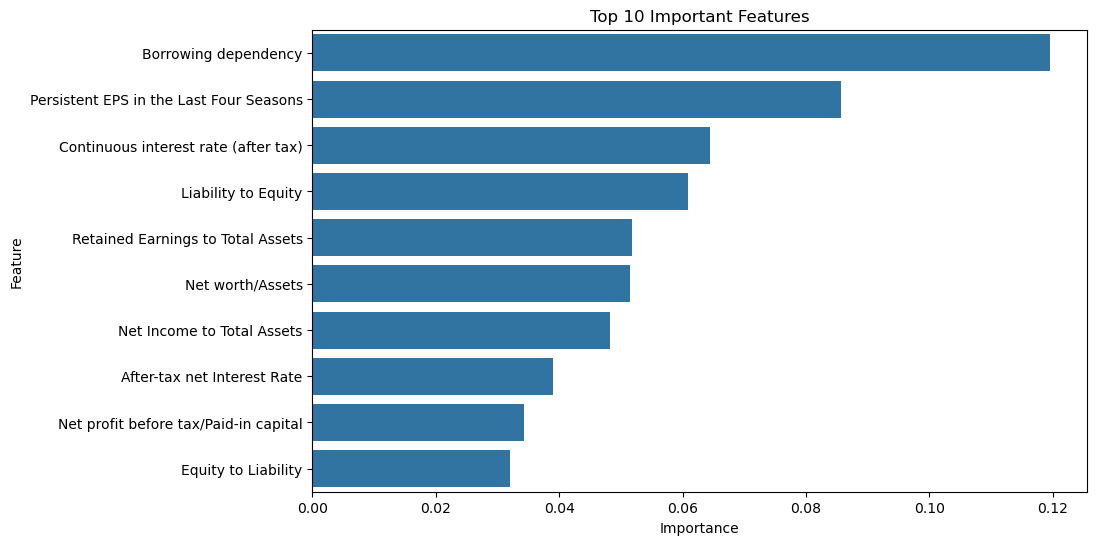

In [69]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Saving the Best Model

The best-performing model is saved as a pickle file for future use. This ensures that the model can be easily loaded and used for predictions without retraining. The file is stored in the `../data/best_model/` directory.


In [ ]:
# Save the best model in a pickle file

pkl_file_path = '../data/best_model/best_model.pkl'

with open(pkl_file_path, 'wb') as file:
    pickle.dump(model4, file)